#### Final performance of piecewise approach

- Evaluated on all 24 BBOB FIDs (2D)
- Comparison of schedules trained on either one of FID {1, 8, 20}, trained on [1, 8, 20] via instances (`all`) and trained on [8, 11, 19] via instances (`allnew`)
- Baselines: Default SMAC BlackBoxFacade + Random schedule, i.e. randomly selecting $\beta$ from $[10^{-3},10^6]$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from carps.analysis.gather_data import normalize_logs, get_interpolated_performance_df

In [3]:
def load_set(paths: list[str], set_id: str = "unknown") -> tuple[pd.DataFrame, pd.DataFrame]:
    logs = []
    for p in paths:
        fn = Path(p) / "trajectory.parquet"
        if not fn.is_file():
            fn = Path(p) / "runs/logs.csv"
        logs.append(pd.read_csv(fn))

    df = pd.concat(logs).reset_index(drop=True)
    df_cfg = pd.concat([pd.read_csv(Path(p) / "runs/logs_cfg.csv") for p in paths]).reset_index(drop=True)
    df["set"] = set_id
    return df, df_cfg

In [4]:
PATH = '/scratch/hpc-prf-intexml/tklenke/experiment_runs/dacbo_piecewise_eval_new'
NAME = 'dacboenv'

In [5]:
def create_df():
    run_dirs = [(PATH, NAME)]
    dfs = [load_set(paths=[ps], set_id=set_id) for ps, set_id in run_dirs]

    df = pd.concat([d for d, _ in dfs]).reset_index(drop=True)
    df = normalize_logs(df)

    perf = get_interpolated_performance_df(df)

    perf_time = get_interpolated_performance_df(df, x_column="time_norm")

    perf.to_parquet(f'{PATH}/perf.parquet')
    perf_time.to_parquet(f'{PATH}/perf_time.parquet')

In [6]:
create_df()

[10:50:07] INFO     Start normalization...                                                       ]8;id=73086;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=657650;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#602\602]8;;\

           INFO     Normalize n_trials...                                                        ]8;id=894981;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=10370;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#603\603]8;;\

           INFO     Normalize cost...                                                            ]8;id=294266;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=512279;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#605\605]8;;\

           INFO     Calc normalized incumbent cost...                                            ]8;id=128127;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=203490;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#621\621]8;;\

           INFO     Normalize time...                                                            ]8;id=89146;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=17859;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#641\641]8;;\

           INFO     Done.                                                                        ]8;id=394672;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=164145;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#644\644]8;;\

           INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=835960;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=658884;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#718\718]8;;\
                    budget.                                                                                        

[10:50:09] INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=678131;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=744272;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#718\718]8;;\
                    budget.                                                                                        

In [7]:
# Data loading
df = pd.read_parquet(f'{PATH}/perf.parquet')

In [8]:
final = pd.DataFrame(columns=['optimizer_id', 'task_id', 'incumbent_value', 'seed'])

for problem in df['task_id'].unique():
    filtered = df[df['task_id'] == problem]

    incumbents = filtered.groupby(["optimizer_id", "seed"])["trial_value__cost_inc_norm"].min().reset_index()
    incumbents.columns = ['optimizer_id', 'seed', 'incumbent_value']
    incumbents['task_id'] = problem

    final = pd.concat([final, incumbents], ignore_index=True)

final.to_csv(f'{PATH}/final.csv')

/tmp/ipykernel_2999890/2516198194.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, incumbents], ignore_index=True)


In [9]:
final = pd.read_csv(f'{PATH}/final.csv')

In [10]:
FIGURE_PATH = '../figures'

In [11]:
df["task_id"].unique()

array(['bbob/2/1/0', 'bbob/2/10/0', 'bbob/2/11/0', 'bbob/2/12/0',
       'bbob/2/13/0', 'bbob/2/14/0', 'bbob/2/15/0', 'bbob/2/16/0',
       'bbob/2/17/0', 'bbob/2/18/0', 'bbob/2/19/0', 'bbob/2/2/0',
       'bbob/2/20/0', 'bbob/2/21/0', 'bbob/2/22/0', 'bbob/2/23/0',
       'bbob/2/24/0', 'bbob/2/3/0', 'bbob/2/4/0', 'bbob/2/5/0',
       'bbob/2/6/0', 'bbob/2/7/0', 'bbob/2/8/0', 'bbob/2/9/0',
       'bbob/8/1/0', 'bbob/8/20/0', 'bbob/8/8/0', 'bbob/8/11/0',
       'bbob/8/19/0'], dtype=object)

In [12]:
from ioh import get_problem, ProblemClass

def get_regret(row):
    
    splits = row["task_id"].split("/")
    d = int(splits[1])
    fid = int(splits[2])
    
    return abs(row["trial_value__cost_inc"] - get_problem(fid, 0, d, ProblemClass.BBOB).optimum.y)

df["regret"] = df.apply(get_regret, axis=1)
df["log_regret"] = df["regret"].map(lambda x: np.log(x + 1e-10))

In [13]:
final_regret = pd.DataFrame(columns=['optimizer_id', 'task_id', 'regret_value', 'seed'])

for problem in df['task_id'].unique():
    filtered = df[df['task_id'] == problem]

    incumbents = filtered.groupby(["optimizer_id", "seed"])["regret"].min().reset_index()
    incumbents.columns = ['optimizer_id', 'seed', 'regret_value']
    incumbents['task_id'] = problem

    final_regret = pd.concat([final_regret, incumbents], ignore_index=True)

/tmp/ipykernel_2999890/95067566.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_regret = pd.concat([final_regret, incumbents], ignore_index=True)


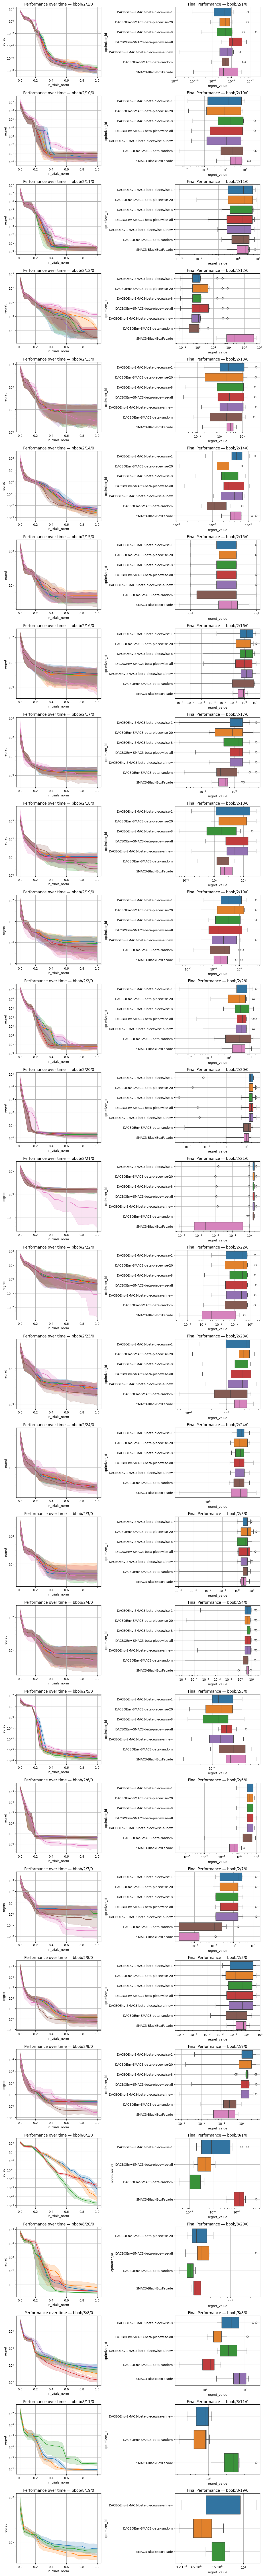

In [14]:
tasks = df["task_id"].unique()

fig, axes = plt.subplots(len(tasks), 2, figsize=(12, 4 * len(tasks)))

for i, task in enumerate(tasks):
    df_task = df[df["task_id"] == task]
    final_task = final_regret[final_regret["task_id"] == task]

    sns.lineplot(
        data=df_task,
        x="n_trials_norm",
        y="regret",
        hue="optimizer_id",
        ax=axes[i, 0]
    )
    axes[i, 0].set_yscale("log")
    axes[i, 0].grid(True)
    axes[i, 0].set_title(f"Performance over time — {task}")
    axes[i, 0].get_legend().remove()

    sns.boxplot(
        data=final_task,
        x="regret_value",
        y="optimizer_id",
        hue="optimizer_id",
        ax=axes[i, 1]
    )
    axes[i, 1].set_xscale("log")
    axes[i, 1].grid(True)
    axes[i, 1].set_title(f"Final Performance — {task}")

plt.tight_layout()
plt.show()
